## Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 3

__Nombres de los estudiantes: Ana Belén Duarte Léon y Ángeles Plaza Gutiérrez

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
df = pd.read_csv("airbnb.csv")
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


Este dataframe se compone de 14998 pisos distintos que se corresponden con el número de filas y 15 columnas que describen las características principales de estos pisos. 
Ahora veremos, que indican cada una de estas variables:

*Acommodates*: indica el número de huéspedes que puede acoger el piso

*Bathrooms*: número de cuartos de baño del piso

*Bedrooms*: número de habitaciones

*Guests_included*: número de huéspedes que se pueden incluir en la reserva

*Host_listings_count*: número de casas que tiene el propietario en la plataforma

*Latitude*: latitud a la que se encuentra el edificio

*Longitude*: longitud en la que se encuentra el piso

*Minimum_nights*: noches mínimas por las que se puede alquilar el piso

*Number_of_reviews*: cantidad de reseñas del piso

*Distance_centre*: distancia al centro de la ciudad

*Instant_bookable*: disponibilidad de reserva inmediata(0 si no, 0 si se puede reservar ya)

*Entire_home*: si se alquila el piso entero (0 no, 1 si)

*Private_room*: si se alquila una habitación privada dentro del piso (0 no, 1 si)

*Shared_room:* si se alquila habitación compartida dentro del piso (0 no, 1 si) 

*Price*: precio del alquiler por noche


Por tanto creemos que aparecen tanto variables númericas como categóricas:
Las variables numéricas son: instant_bookable, entire_home, private_room  y shared_room. Y todas pueden tomar valor 0 o 1.
El resto de variables que aparecen en los datos son numéricas. Fijándonos en estas variables numéricas podemos observar que presentan escalas relativamente parecidas, excluyendo la variable price, que en realidad es nuestro target.

In [3]:
# Mostrar datos estadísticos de cada columna y su distribución
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


In [4]:
#Ahora nos fijamos solamente en la distribución de la variable precio
df['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64


Con estos datos podemos plantear un problema de regresión que consiste en decidir el precio del alquiler de un alojamiento atendiendo a sus características a través de los datos y las variables dadas.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [5]:
#buscamos las variables más correladas con la variable a predecir (target)
correl=df.corr(method='pearson')
correl['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

### Observaciones ###
Las principales variables que se relacionan de forma directamente proporcional con el precio del alojamiento son *acommodates* y *bedrooms* pues los alojamientos más caros son los que pueden acoger a un mayor número de personas y que poseen mayor número de habitaciones. Por otro lado, las variables que se relacionan de forma inversamente proporcional al precio en mayor medida es *private_room* puesto que el precio será menor si se trata de una habitación privada dentro de una casa en vez de alquilarse el alojamiento completo. 

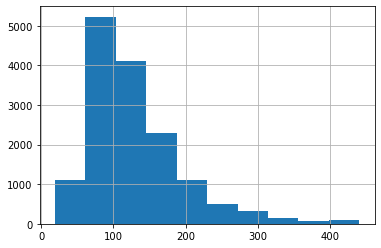

In [6]:
df.price.hist()

In [7]:
#Nos vamos a crear ahora un nuevo dataframe con precio y las variables que se relacionen con el
#él de forma inversa o directa con un coeficiente de correlación de al menos 0.2
df1=df.drop(['number_of_reviews','shared_room', 'instant_bookable','minimum_nights','longitude','latitude','host_listings_count'],axis=1 )
df1

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

### Razonamiento
Teóricamente las redes neuronales están capacitadas y se adaptan a trabajar con valores de variables muy distintos, tanto muy grandes como muy pequeños simultáneamente. Podemos presentar coeficientes de regularización que impidan pesos grandes para las variables que toman valores mucho mayores. Sin embargo, es mejor reescalar los datos ya que así conseguimos que el entrenamiento converja en mucho menos tiempo. Por lo tanto, decidiremos reescalar los datos.

In [23]:
from sklearn.preprocessing import StandardScaler
# Transformamos las variables de entrada
df_sin=df1.drop(['price'],axis=1)
escala_x = StandardScaler()
escala_x.fit(df_sin.values)
datos_escalados=escala_x.transform(df_sin.values)
#uso dos escaler distintos poque luego querrre desescalar la y
# Y también transformamos la variable de salida
escala_y = StandardScaler()
escala_y.fit(df1.price.values.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
precio_escalado=escala_y.transform(df1.price.values.reshape(-1, 1))
#tengo que decirle que mi target es vector de 1


In [24]:
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
scalery = MinMaxScaler()
datos_minmax=scalerx.fit_transform(df_sin.values)
precio_minmax=scalery.fit_transform(df1.price.values.reshape(-1,1))

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
RANDOM_STATE=333

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, datos_escalados, precio_escalado.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5015792651373208,
  -0.5056569462264315,
  -0.5084204672073943,
  -0.5072291979532284,
  -0.5074247879443388,
  -0.5077170828883004],
 [0.018727378885212927,
  0.019781005554062037,
  0.020554513858729473,
  0.02050757976444049,
  0.02120842714793496,
  0.0201014701503615])

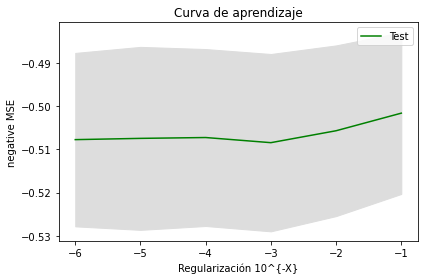

In [31]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
RANDOM_STATE=333
cv_scores_mean2=[]
cv_scores_std2=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp2=MLPRegressor(hidden_layer_sizes=(100,100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp2,  datos_escalados, precio_escalado.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores.mean())
    cv_scores_std2.append(scores.std())

cv_scores_mean2, cv_scores_std2

([-0.502240131969217,
  -0.5212723846928,
  -0.530903750393702,
  -0.5558301501345193,
  -0.5364957151102594,
  -0.5351471772454092],
 [0.019461952672887056,
  0.02322501695732067,
  0.016220808847548222,
  0.019525490609176844,
  0.021141829734150356,
  0.01667836776259127])

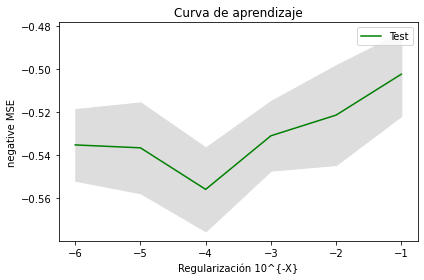

In [33]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

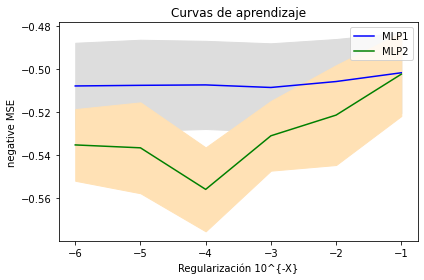

In [34]:
import matplotlib.pyplot as plt
#Vamos a dibujar en la misma gráfica los datos de ambas redes para poder compararlos
#más fácilmente

# Línea de la exactitud media de cada clasificador 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="b", label="MLP1")
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="MLP2")

# desviación típica de la red 1
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# desviación típica de la red 2
lower_limit=np.array(cv_scores_mean2)-np.array(cv_scores_std2)
upper_limit=np.array(cv_scores_mean2)+np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#ffe1b5")


plt.title("Curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este caso, donde los datos se han normalizado con la escala estándar, claramente la red 1 formada por una sola capa de 200 neuronas domina a la segunda red que es la formada por dos capas de 100 neuronas cada una. La curva de aprendizaje en la primera red es casi lineal, lo que indica que la elección del parámetro de regularización no es muy importante en el caso de tener una red neuronal con una sola capa y 200 neuronas. En el caso de la segunda red, la curva de aprendizaje si que cambia según el coeficiente de regularización elegido y vemo que cuanto mayor es este (más próximo a -1) el error cuadrático medio que comete la red se suaviza bastante. Como la red de una sola capa es la que posee un error cuadrático medio menor a la hora de predecir el target, el precio nuestra intuición nos dice que la función que tratamos de aproximar, es decir la función que predice el precio del alquiler según las variables que más influyen en él calculadas anteriormente no es muy compleja puesto que sino serían necesarias más capas y obtendríamos un mejor resultado para la red de dos capas de neuronas.

Por tanto, nos quedaríamos con la red 1 puesto que su desviación típica es mucho menor en los resultados de validación y el coeficiente de regularización en este caso sería indiferente puesto que se obtiene prácticamente lo mismo para todos los valores del mismo.

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
RANDOM_STATE=333

cv_scores_meanmm=[]
cv_scores_stdmm=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlpMM1=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlpMM1, datos_minmax, precio_minmax.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_meanmm.append(scores.mean())
    cv_scores_stdmm.append(scores.std())

cv_scores_meanmm, cv_scores_stdmm

([-0.012678058326870708,
  -0.012226656573093376,
  -0.012274867316486719,
  -0.012250040777821141,
  -0.012243364484804887,
  -0.012228302978063623],
 [0.0003966419209093998,
  0.00027398866706305764,
  0.00020223707355082875,
  0.00020722075014518768,
  0.0002049348239465782,
  0.0002179473392655419])

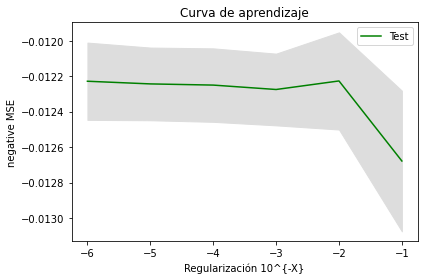

In [26]:
import matplotlib.pyplot as plt
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_meanmm, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_meanmm) - np.array(cv_scores_stdmm)
upper_limit = np.array(cv_scores_meanmm) + np.array(cv_scores_stdmm)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [27]:
RANDOM_STATE=333

cv_scores_meanmm2=[]
cv_scores_stdmm2=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlpMM2=MLPRegressor(hidden_layer_sizes=(100,100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlpMM2, datos_minmax, precio_minmax.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_meanmm2.append(scores.mean())
    cv_scores_stdmm2.append(scores.std())

cv_scores_meanmm2, cv_scores_stdmm2

([-0.012723697054611228,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.011694373017149111,
  -0.011754652440453182],
 [0.0003885895981672489,
  0.0003546605235645444,
  0.0004269019094578842,
  0.0004430868314513379,
  0.0004360268404662567,
  0.0004594379346826702])

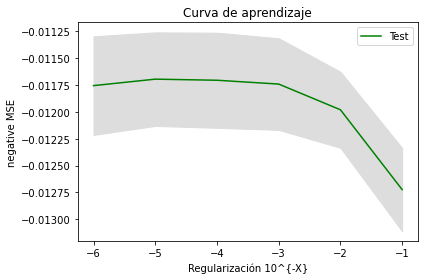

In [28]:
import matplotlib.pyplot as plt
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_meanmm2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_meanmm2) - np.array(cv_scores_stdmm2)
upper_limit = np.array(cv_scores_meanmm2) + np.array(cv_scores_stdmm2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

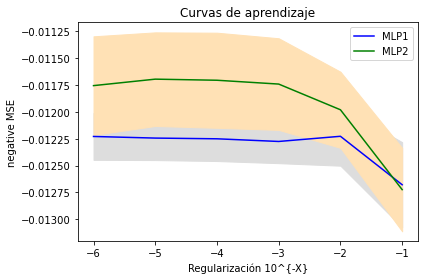

In [29]:
import matplotlib.pyplot as plt
#Vamos a dibujar en la misma gráfica los datos de ambas redes para poder compararlos
#más fácilmente

# Línea de la exactitud media de cada clasificador 
plt.plot(np.log10(regul_param_range), cv_scores_meanmm, color="b", label="MLP1")
plt.plot(np.log10(regul_param_range), cv_scores_meanmm2, color="g", label="MLP2")

# desviación típica de la red 1
lower_limit=np.array(cv_scores_meanmm)-np.array(cv_scores_stdmm)
upper_limit=np.array(cv_scores_meanmm)+np.array(cv_scores_stdmm)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# desviación típica de la red 2
lower_limit=np.array(cv_scores_meanmm2)-np.array(cv_scores_stdmm2)
upper_limit=np.array(cv_scores_meanmm2)+np.array(cv_scores_stdmm2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#ffe1b5")


plt.title("Curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este caso, estandarizando con la escala MinMax el error cuadrático medio es menor en la segunda red neuronal, la formada por dos capas de dos neuronal. Ambas redes aumentan considerablemente su error al predecir el precio cuando el coeficiente de regularización supera el valor -2.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [35]:
from sklearn.model_selection import cross_val_predict
# estimamos 
predicts_scaled = cross_val_predict(mlp, datos_escalados, precio_escalado.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=escala_y.inverse_transform(predicts_scaled)

In [36]:
errors = np.abs(df1.price - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df1['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.676108446381456
Desviación típica: 32.52718475667896
Error medio en %: 24.35681804090805


El error medio en euros es 31.6€, lo que no parece muy significativo en términos de un alquiler. Sin embargo, a la hora de ver porcentajes: 

El error medio del modelo es de un 24%. Bajo nuestro punto de vista se aleja bastante de ser óptimo, ya que un error tan alto supone una diferencia significativa de precio, pues tratamos con números altos por tratarse de un alquiler. Sin embargo todo depende del contexto. Si por ejemplo hablamos de un alquiler vacacional en el que van a participar en el pago muchas personas (un grupo de amigos o varias familiar) , a la hora de pagar, ese error del 24% influye bastante poco en lo que debe pagar cada individuo, por lo que para ellos este error no supone un gran problema. Si por el contrario todo el peso del alquiler cae sobre un único individuo, para él sí puede suponer una gran diferencia, que se hace más notable cuanto mayor sea la cantidad con la que estamos tratando (casas más caras o estancias más largas).

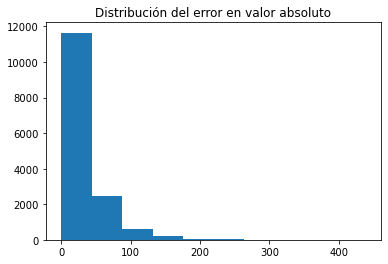

In [37]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

La mayor parte de los errores se concentran en la parte izquierda de la gráfica, de hecho el cambio no es progresivo, cae en picado al ir hacia la derecha.

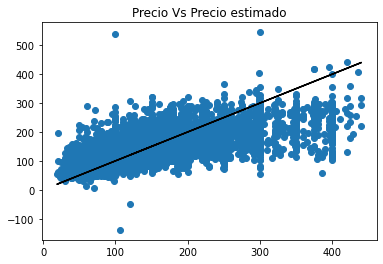

In [38]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df1.price, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df1.price, df1.price, color='k') 

plt.title('Precio Vs Precio estimado')
plt.show()
#dibujar valor real vs valor estimado



Hemos dibujado la distancia entre el valor predicho por el modelo y el valor real en una gráfica. Como sabemos, la diagonal de esta gráfica representa error 0.

Por ello, se hace visible que cometemos errores en todo el rango de valores posible. Al tener tantos datos, los puntos del gráfico cubren prácticamente toda la zona circundante a la diagonal en los valores de rangos bajos. Por ello, en toda esta primera etapa del gráfico existen algunos valores pronosticados que tienen error 0, aunque como hemos dicho, casi parece que existiese una franja sobre la diagonal, por lo que se producen muchos errores. Sin embargo, a medida que aumentamos el precio perdemos la corrección total: seguimos teniendo errores pero desaparecen aquellos puntos que nos proporcionaban error 0 por coincidir con la diagonal. Los puntos se encuentran más dispersos.

Asimismo, podemos observar que la magnitud del error se hace más visible cuando aumentamos el valor, y además la tendencia es a infravalorarlo para estos rangos altos, ya que los puntos se encuentran en su mayoría por debajo de la diagonal.

En su contra, a valores del rango más pequeños, el error suele ser debido a una sobreestimación del precio, ya que la mayor parte de los puntos se encuentran por encima del error 0, aunque también existen datos con valores reducidos que infravaloran. 

El error llega a ser tal que encontramos una estimación absurda, por ser negativa. Y dos valores en los que el precio predicho sale completamente desorbitado y se predice un precio altísimo. 
